a wins:  47.8 b wins:  52.2 a turns: 25 b turns: 24 total turns: 49


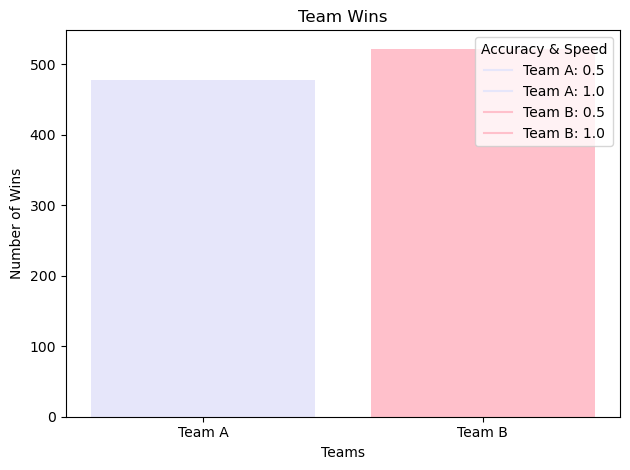

Single Game Simulation Results
-------------  -----------
Result:        Team B Wins
Team A Score:  4
Team B Score:  11
Team A Hits:   36
Team B Hits:   35
Total Hits:    71
-------------  -----------


In [2]:
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

#sets the size of the field, a greater max will lead to lower accuracy for the tables, minimum should stay 0
play_field_min = 0
play_field_max = 100
field_range = play_field_max - play_field_min

#location variables for the two tables, it will pick a value within the range of the field as the location of the table
Table_A_loc = random.randint(play_field_min, play_field_max)
Table_B_loc = random.randint(play_field_min, play_field_max)

#A value 0 < x < 1 that corresponds with the set accuracy of a player, one of the main values to alter to test the sim
Player_A_acc = 0.5
Player_B_acc = 0.5

#Sets variables for table speed for 0 < x < 2. Could go higher, but leads to a significant change
table_speed_a = 1.0
table_speed_b = 1.0

#safety to ensure that both scores start at zero reguardless of function ran
team_a_wins = 0
team_b_wins = 0

def game_stats(x):
    global team_a_wins, team_b_wins, a_turns, b_turns
    team_a_wins = 0
    team_b_wins = 0
    
    #simulates x amount of games, not recommended to do more than 1000
    for i in range(x):
        start_game()
    
    #using data from the games, determines how many times A won vs B, and how many turns were taken in the last game
    print('a wins: ', (team_a_wins * 100) / x, 'b wins: ', (team_b_wins * 100) / x, 'a turns:',  a_turns, 'b turns:'
          , b_turns, 'total turns:', a_turns+b_turns)
    
    teams = ['Team A', 'Team B']
    wins = [team_a_wins, team_b_wins]
    team_a_stats = [Player_A_acc, table_speed_a]
    team_b_stats = [Player_B_acc, table_speed_b]

    # Creating the bar plot
    bars = plt.bar(teams, wins, color=['lavender', 'pink'])

    # Adding titles and labels
    plt.title('Team Wins')
    plt.xlabel('Teams')
    plt.ylabel('Number of Wins')
    
    #creates the legends
    a_handles = [plt.Line2D([0], [0], color='lavender', label=f'Team A: {a}') for a in team_a_stats]
    b_handles = [plt.Line2D([0], [0], color='pink', label=f'Team B: {b}') for b in team_b_stats]
    
    # Display legends
    plt.legend(handles=a_handles + b_handles, loc='upper right', title='Accuracy & Speed')
    
    plt.tight_layout()

    # Displaying the plot
    plt.show()
    
def single_game():
    global team_a_point, team_b_point, a_turns, b_turns
    
    start_game()
    
    #creates/formats a table with the results from a single game after running the function for a single game
    print('Single Game Simulation Results')
    result_table = [
        ["Result:", result],
        ["Team A Score:", team_a_point],
        ["Team B Score:", team_b_point],
        ["Team A Hits:", a_turns],
        ["Team B Hits:", b_turns],
        ["Total Hits:", a_turns + b_turns]
    ]
    print(tabulate(result_table, tablefmt="line"))
    
def start_game():
    global team_a_point, team_b_point, a_turns, b_turns, result
    
    #ensures counting variables are reset to zero
    team_a_point = 0
    team_b_point = 0
    a_turns = 0
    b_turns = 0
    
    #determines if team A or B starts the game, and initiates their turn
    start_player = random.uniform(0, 1)
    if start_player > 0.5:
        #print('a_start')
        a_turns += 1
        player_a_turn()
    else:
        #print('b_start')
        b_turns += 1
        player_b_turn()
        
    

def player_a_turn():
    global team_a_point, team_b_point, a_turns, b_turns, result
    
    #simulates a hit with the proability of hitting based on the skill level set,
    #turns turn over to team B if it hits the table
    Hit_A = random.uniform(0, 1)
    if Hit_A <= Player_A_acc:
        #print('A success hit')
        b_turns += 1
        player_b_turn()

    #simulates if the table saves the ball or not, determines scoring and if a win is achieved
    else:
        ball_a = field_range * (1 - Hit_A)
        table_move_a = random.randint(play_field_min, 0.25*play_field_max)*table_speed_a
        if table_move_a <= ball_a:
            #print('Team A Fail, Team B Point')
            team_b_point += 1
            if team_b_point == 11:
                #if team_a_point<(team_b_point-2):
                    result = 'Team B Wins'
                    global team_b_wins
                    team_b_wins += 1
                    return
            b_turns += 1
            player_b_turn()
        else:
            b_turns += 1
            player_b_turn()

def player_b_turn():
    global team_a_point, team_b_point, a_turns, b_turns, result
    
    Hit_B = random.uniform(0, 1)
    if Hit_B <= Player_B_acc:
        #print('B success hit')
        a_turns += 1
        player_a_turn()
        
    else:
        ball_b = 100 * (1 - Hit_B)
        table_move_b = random.randint(play_field_min, 0.25*play_field_max)*table_speed_b
        if table_move_b <= ball_b:
            #print('Team B Fail, Team A Point')
            team_a_point += 1
            if team_a_point == 11:
                #if team_b_point<(team_a_point-2):
                    global team_a_wins
                    result = 'Team A Wins'
                    team_a_wins += 1
                    return
            a_turns += 1
            player_a_turn()
        else:
            a_turns += 1
            player_a_turn()

game_stats(1000)
single_game()